# Goodreads Books with Genre
## Data Processing

In [60]:
import kagglehub
import pandas as pd
import statistics

Start with data processing! Import the data, parse through data to make sure they are all the correct types, and create a DataFrame

In [61]:
# Download latest version
file = kagglehub.dataset_download("middlelight/goodreadsbookswithgenres")

df = pd.read_csv('./goodreadsbookswithgenres/Goodreads_books_with_genres.csv')
df.head()


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."


In [62]:
print("(cols, rows):", df.shape)
df.dtypes

(cols, rows): (11127, 13)


Book Id                 int64
Title                  object
Author                 object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
genres                 object
dtype: object

In [63]:
df.count()

Book Id               11127
Title                 11127
Author                11127
average_rating        11127
isbn                  11127
isbn13                11127
language_code         11127
num_pages             11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
genres                11030
dtype: int64

The `count()` function shows that the only column that has null values is genre. Since majority of our questions deal with genre, we are going to remove the books without a genre. Since the genres column is important, we are going to clean up the data by turning the string into an array.

In [64]:
# Drop all the rows without a genre
df = df.dropna(how='any')

# Turn the genres column from a string into an array
df.loc[:, 'genres'] = df['genres'].apply(lambda input: input.split(';'))
df.head()


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."


Next, since we will be using the publication date, we want to convert the string into a datetime object for easier computation.

In [65]:
# Convert to datetime
df.loc[:, 'publication_date'] = df['publication_date'].apply(lambda date: pd.to_datetime(date,  errors='coerce'))

# Look at rows that are NaT (not a time)
nat_rows = df[df['publication_date'].isna()]
nat_rows

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books,"[Mystery, Fiction, Mystery,Crime, Thriller,Mys..."
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire,"[History, Nonfiction, Cultural,France, Histori..."


Since there are only two rows without a date, we feel comfortable removing them, since they will not make a huge impact on our data.

In [66]:
# Remove the rows with NaT
df = df.dropna(subset=['publication_date'])
df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."


Now let's do some basic exploration of the data. Looking at the range of publication dates, genres, number of pages, publishers, average rating.

In [67]:
# Range of publication dates
min_date = df['publication_date'].min()
max_date = df['publication_date'].max()
print("Publication date ranges from", min_date, "to", max_date)

# Range of number of pages
min_pages = df['num_pages'].min()
max_pages = df['num_pages'].max()
print("Number of pages ranges from", min_pages, "to", max_pages)

# Range of average rating
min_average_rating = df['average_rating'].min()
max_average_rating = df['average_rating'].max()
print("Average rating ranges from", min_average_rating, "to", max_average_rating)

# Range of number of ratings
min_ratings = df['ratings_count'].min()
max_ratings = df['ratings_count'].max()
print("Number of ratings ranges from", min_ratings, "to", max_ratings)

# List of publishers
unique_publishers = df['publisher'].unique()
print("List of publishers:", unique_publishers)

# List of genres
all_genres = df['genres'].explode()
unique_genres = all_genres.unique()
print("List of first 25 genres (including subgenres):", unique_genres[:25])
print("Number of genres (including subgenres):", len(unique_genres))

Publication date ranges from 1900-01-01 00:00:00 to 2020-03-31 00:00:00
Number of pages ranges from 0 to 6576
Average rating ranges from 0.0 to 5.0
Number of ratings ranges from 0 to 4597666
List of publishers: ['Scholastic Inc.' 'Scholastic' 'Nimble Books' ... 'Suma'
 'Panamericana Editorial' 'Editorial Presença']
List of first 25 genres (including subgenres): ['Fantasy' 'Young Adult' 'Fiction' 'Fantasy,Magic' 'Childrens' 'Adventure'
 'Audiobook' 'Childrens,Middle Grade' 'Classics' 'Science Fiction Fantasy'
 'Fantasy,Supernatural' 'Mystery' 'Fantasy,Paranormal' 'Novels'
 'Paranormal,Wizards' 'Science Fiction' 'Humor' 'Humor,Comedy'
 'European Literature,British Literature' 'Nonfiction' 'Science' 'History'
 'Science,Physics' 'Science,Popular Science' 'Historical']
Number of genres (including subgenres): 890


That is a lot of genres! If you notice, some of these are subgenres. For example 'Fantasy,Epic'. To make it easier to graph later, we are going to make a list of all the 'main' genres (i.e. those without a subgenre attached).

In [68]:
main_genres = df['genres'].apply(lambda x: [genre for genre in x if ',' not in genre]).explode()
unique_main_genres = main_genres.unique()

print("List of first 25 genres:", unique_main_genres[:25])
print("Number of genres:", len(unique_main_genres))


List of first 25 genres: ['Fantasy' 'Young Adult' 'Fiction' 'Childrens' 'Adventure' 'Audiobook'
 'Classics' 'Science Fiction Fantasy' 'Mystery' 'Novels' 'Science Fiction'
 'Humor' 'Nonfiction' 'Science' 'History' 'Historical' 'Philosophy'
 'Unfinished' 'Travel' 'Biography' 'Reference'
 'The United States Of America' 'Literature' 'Art' 'Media Tie In']
Number of genres: 235


Next, we are going to remove the books that have a page length of 0. Since a book without pages is not really considered a book to us.

In [69]:
# Genres with the most books
top_genres = main_genres.value_counts().head(25)
top_genres

genres
Fiction                    6933
Classics                   3333
Nonfiction                 3107
Literature                 2845
Fantasy                    2550
Novels                     2529
Audiobook                  1637
History                    1616
Mystery                    1603
Romance                    1547
Historical                 1396
Contemporary               1358
Adventure                  1304
Adult                      1263
Young Adult                1259
Philosophy                 1234
Science Fiction            1166
Childrens                  1157
Humor                      1129
Thriller                   1099
Biography                  1071
Literary Fiction           1049
Science Fiction Fantasy     968
Short Stories               871
Horror                      748
Name: count, dtype: int64

# Test 1: Does a higher number of ratings lead to a lower average rating?
### We'll compare the number of ratings to the average rating for *each book*.


*   HO: Total number of ratings for individual books does not have an effect on average rating.
*   HA: Total number of ratings for individual books does have an effect on average rating.


In [70]:
# dataframe displaying info for just the top 25 genres
top_genres_list = top_genres.index.tolist()

df_top_genres = df[df['genres'].apply(lambda x: any(genre in top_genres_list for genre in x))]
df_top_genres

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21 00:00:00,Da Capo Press,"[Fiction, Writing,Essays, Literature,American,..."
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01 00:00:00,Penguin Books,"[Fiction, Science Fiction, Literature, Novels,..."
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01 00:00:00,Penguin Books,"[Historical,Historical Fiction, Fiction, Novel..."
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2007-02-27 00:00:00,Ecco,"[Nonfiction, Sociology, Social Issues,Poverty,..."


In [71]:
# note: there are also fewer than 70 books with an average rating less than 3.00
df.sort_values('average_rating').head(70)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
7576,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0.00,9027712050,9789027712059,eng,210,0,0,1981-05-31 00:00:00,Springer,[History]
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.00,1932206086,9781932206081,eng,304,0,0,2003-01-01 00:00:00,Frederick P. Lenz Foundation for American Budd...,[Spiritual life]
7637,29404,Your Child and Jesus: A Family Activity Book,Rick Osborne/Kevin Miller,0.00,080242855X,9780802428554,eng,112,0,0,1999-09-13 00:00:00,Moody Publishers,"[Family, Relationships]"
11031,45259,Anthony Thwaite: In Conversation With Peter Da...,Peter Dale/Ian Hamilton/Anthony Thwaite,0.00,0953284123,9780953284122,eng,96,0,0,1999-12-09 00:00:00,Between the Lines Productions,[Literary Criticism]
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.00,0744005612,9780744005615,eng,112,0,0,2005-06-01 00:00:00,BradyGames,"[Games, Activities]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,4221,The Guide to Dan Brown's the Solomon Key,Greg Taylor,2.98,0875168167,9780875168166,en-US,183,34,2,2005-09-30 00:00:00,DeVorss & Company,[Fiction]
9159,35760,Mistaken Identity,Nayantara Sahgal,2.98,8172235224,9788172235222,eng,324,0,0,2016-12-30 00:00:00,Harper Collins,"[Fiction, Novels]"
96,159,Dinner with Anna Karenina,Gloria Goldreich,2.99,0778322270,9780778322276,eng,360,411,65,2006-01-28 00:00:00,Mira Books,"[Fiction, Writing,Books About Books, Contempor..."
9546,37902,Turn of the Cards,Georgina Grey,3.00,0449239691,9780449239698,eng,0,3,1,1979-05-12 00:00:00,Fawcett Coventry,[Fiction]


In [72]:
# note: there are no average ratings 'x' where 0.00 < x < 2.00
df.sort_values('average_rating').head(30)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
7576,29091,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel/Michael John Petry,0.00,9027712050,9789027712059,eng,210,0,0,1981-05-31 00:00:00,Springer,[History]
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.00,1932206086,9781932206081,eng,304,0,0,2003-01-01 00:00:00,Frederick P. Lenz Foundation for American Budd...,[Spiritual life]
7637,29404,Your Child and Jesus: A Family Activity Book,Rick Osborne/Kevin Miller,0.00,080242855X,9780802428554,eng,112,0,0,1999-09-13 00:00:00,Moody Publishers,"[Family, Relationships]"
11031,45259,Anthony Thwaite: In Conversation With Peter Da...,Peter Dale/Ian Hamilton/Anthony Thwaite,0.00,0953284123,9780953284122,eng,96,0,0,1999-12-09 00:00:00,Between the Lines Productions,[Literary Criticism]
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.00,0744005612,9780744005615,eng,112,0,0,2005-06-01 00:00:00,BradyGames,"[Games, Activities]"
6561,24749,American Writers Supplement VIII,Jay Parini/August Wilson,0.00,0684806371,9780684806372,eng,400,0,0,2001-05-01 00:00:00,Gale Cengage,[American literature]
6383,24010,"Laguna I Love You: The Best of ""Our Town",John Weld/Phil Interlandi,0.00,1564741575,9781564741578,eng,285,0,0,1996-03-01 00:00:00,Fithian Press,[History]
5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.00,0916724948,9780916724948,eng,63,0,0,1997-12-31 00:00:00,Arts Publications,[Art]
10142,41044,Day and Night,Better Homes and Gardens,0.00,0696018829,9780696018824,eng,32,0,1,1989-03-01 00:00:00,Meredith Corporation,[Juvenile Nonfiction]
7402,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.00,0071485422,9780071485425,eng,248,0,0,2011-12-30 00:00:00,McGraw-Hill Professional Publishing,[Medical]


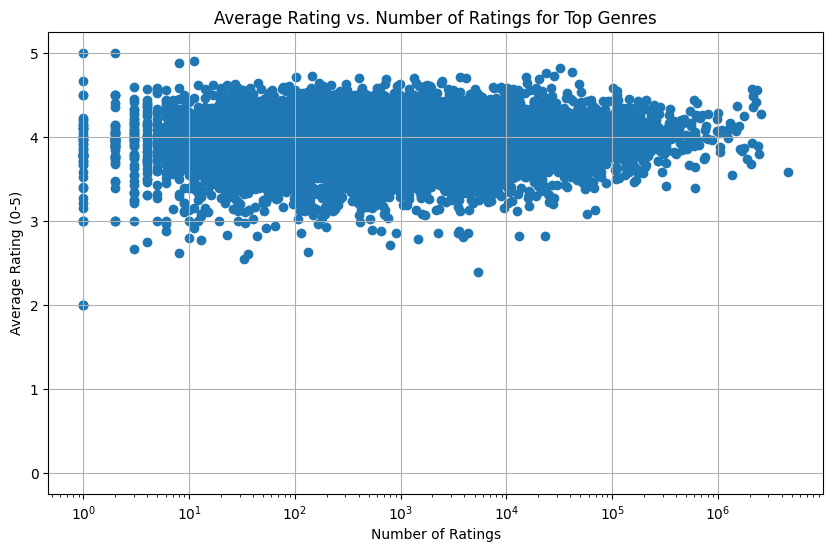

In [73]:
# scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_top_genres['ratings_count'], df_top_genres['average_rating'])
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating (0-5)")
plt.title("Average Rating vs. Number of Ratings for Top Genres")
plt.xscale('log')

plt.grid(True)
plt.show()

In [74]:
# apply Pearson's correlation test on the dataframe with top genres
from scipy import stats
result = stats.pearsonr(df_top_genres['ratings_count'], df_top_genres['average_rating'])
result.pvalue

1.1921141854582813e-05

The p-value of approximately 1.192 x 10^-5 is much smaller than the significance level of 0.05. Therefore, we can reject the null hypothesis, which had stated that the total number of ratings didn't have a significant effect on the average ratings for books. The number of ratings a book has does effect the average rating for the book.

This makes sense because the more people that read a book, who have differing opinions and world experiences, will provide more diverse ratings.